# Cargando los Datos

Datos del 01/02/2018 al 28/02/2018<br>
Los datos Genre están expresados en minutos vistos en el mes<br>


In [20]:
!pip install pydotplus

  Stored in directory: C:\Users\ssteyerer\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import sklearn.datasets as datasets
import pandas as pd
import random
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [4]:
data = pd.read_csv(r"FullData.csv")
data['Date of birth']= pd.to_datetime(data['Date of birth'],format='%Y-%m-%d') 
data.head()

,Panelist ID,Sex code,Date of birth,Marital status,Household status,Working status,Terminal age of education,Welsh Language code,Gaelic language code,Dependency of Children,...,Genre Hobbies/Leisure,Genre Documentaries,Genre Religious,Genre Sport,Genre Children,Genre PP Broadcast,Genre Education,Genre Other Films,Genre Other,Genre Other.1
0,9013301,2,1970-04-01,1,2,2,2,9,9,9,...,4.00,12.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,4082903,2,2010-11-01,2,1,5,4,9,9,9,...,0.00,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,151.77
2,5058901,2,1971-06-01,1,2,4,2,9,9,9,...,606.73,1751.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,896.13
3,52001,1,1956-10-01,2,4,4,1,9,9,9,...,439.03,1112.9,0.0,54.0,34.0,0.0,0.0,0.0,0.0,506.87
4,3673203,2,1997-10-01,2,1,5,4,9,9,9,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10077 entries, 0 to 10076
Data columns (total 50 columns):
Panelist ID                   10077 non-null int64
Sex code                      10077 non-null int64
Date of birth                 10077 non-null datetime64[ns]
Marital status                10077 non-null int64
Household status              10077 non-null int64
Working status                10077 non-null int64
Terminal age of education     10077 non-null int64
Welsh Language code           10077 non-null int64
Gaelic language code          10077 non-null int64
Dependency of Children        10077 non-null int64
Life stage                    10077 non-null int64
Ethnic Origin                 10077 non-null int64
Disability                    10077 non-null int64
No of TV Sets                 10077 non-null int64
No of VCRs                    10077 non-null int64
No of PVRs                    10077 non-null int64
No of DVDs                    10077 non-null int64
No of People   

## Descripcion de los valores:

**Sex code:**<br>
1 = Male<br>
2 = Female<br>

**Marital status**<br>
1 = Married / living as married<br>
2 = Single / divorced / separated <br>
9 = Unclassified <br>

**Household status**<br>
1 = Neither Houseperson nor head of household <br>
2 = Houseperson and NOT Head of Household <br>
3 = Head of household and NOT Houseperson <br>
4 = Both Houseperson and head of household <br>
9 = Unclassified <br>

**Working status**<br>
1 = Working 30+ hours per week <br>
2 = Working 8-29 hours per week <br>
3 = Working less than 8 hours per week <br>
4 = No paid work <br>
5 = Full time education / under school age <br>
9 = Unclassified <br>

**Terminal age of education**<br>
1 = 15 years and under <br>
2 = 16-18 years <br>
3 = 19 + years <br>
4 = Still in education <br>
9 = Unclassified <br>

**Welsh Language code Welsh**<br>
speaking fluency. Understand, speak write and read Welsh: <br>
1 = Extremely well <br>
2 = Quite well <br>
3 = A little <br>
4 = Can understand and speak some Welsh <br>
5 = Can understand a little Welsh <br>
9 = Not Welsh speaking/Not in Wales <br>
0 = Unclassified <br>

**Gaelic language code**<br>
Gaelic speaking fluency. Understand, speak, write and read Gaelic. <br>
1 = Extremely well <br>
2 = Quite well <br>
3 = A little <br>
4 = Can understand and speak some Gaelic <br>
5 = Can understand a little Gaelic <br>
9 = Not Gaelic speaking/Not in Scotland<br> 
0 = Unclassified <br>

**Dependency of Children**<br>
1 = Parent/Guardian <br>
2 = Dependent Child <br>
3 = Neither <br>
9 = Unclassified<br>

**Lifestage (12 way classification)**<br>
01 = Single, no children, with parents, aged 16-34 <br>
02 = Single, no children, on own or with friends, aged 16-34 <br>
03 = Couple, no children, aged 16-34 <br>
04 = Single, no children, on own or with friends, aged 35-54 <br>
05 = Couple, no children, aged 35-54 <br>
06 = Single, no children, on own, aged 55+ <br>
07 = Couple, no children, aged 55+ <br>
08 = Either, youngest children 0-4, includes single parents <br>
09 = Either, youngest children 5-9, includes single parents <br>
10 = Either youngest children 10-15, includes single parents <br>
11 = Either, Children 16+ none 0-15, aged 35+ <br>
12 = Other <br>
99 = Unclassified <br>

**Ethnic Origin**<br>
01 = White British<br>
02 = Black – Caribbean<br>
03 = Black – African<br>
04 = Black – other<br>
05 = Asian – Indian <br>
06 = Asian – Pakistani <br>
07 = Asian – Bangladeshi <br>
08 = Chinese <br>
09 = Any other background <br>
10 = Other White <br>
11 = Mixed – White/Black Caribbean <br>
12 = Mixed – White/Black African <br>
13 = Mixed – White/Asian <br>
14 = Other mixed background <br>
15 = Other Asian background <br>
16 = Don’t know <br>
17 = Refused <br>
99 = Unclassified<br> 

**Disability**<br>
Normal daily activities limited by long-term disability/health problem: <br>
001 = Yes, Limited a lot <br>
002 = Yes, Limited a little <br>
003 = No <br>
999 = Unclassified <br>

**Social Class**<br>
AB - Higher & intermediate managerial, administrative, professional occupations<br>
C1 - Supervisory, clerical & junior managerial, administrative, professional occupations<br>
C2 - Skilled manual occupations<br>
D/space - Semi-skilled & unskilled manual occupations<br>
E/space - Unemployed and lowest grade occupations<br>
blank is ‘Unclassified’<br>


**Presence of Children**<br>
1 = No children<br>
2 = With children aged 0-3 years<br>
3 = With children aged 4-9 years<br>
4 = With children aged 0-3 and 4-9 years<br>
5 = With children aged 10-15 years<br>
6 = With children aged 0-3 and 10-15 years<br>
7 = With children aged 4-9 and 10-15 years<br>
8 = With children aged 0-3 and 4-9 and 10-15 years<br>
9 = Unclassified<br>

**Demographic cell**<br>
Cell Lifestage Social Class<br>
1 Pre-Family ABC1<br>
2 Pre-Family C2DE<br>
3 Young Family ABC1<br>
4 Young Family C2DE<br>
5 Older Family ABC1<br>
6 Older Family C2DE<br>
7 Post Family ABC1<br>
8 Post Family C2DE<br>
9 Inactive ABC1<br>
10 Inactive C2DE<br>

**Language Spoken at Home**<br>
1 = Welsh<br>
2 = English<br>
3= Welsh & English equally<br>
4 = Welsh and other language than English (equally)<br>
5 = Other<br>
9 = Undefined<br>

**Welsh Speaking Home**<br>
1 = Wholly Welsh Speaking (all individuals 4+ are of Fluency 1, 2, 3 or 4)<br>
2 = Partly Welsh Speaking (some individuals 4+ are of Fluency 1, 2, 3 or 4 with other being 5 or 6) 3 = Non Welsh Speaking<br>
9 = Unclassified<br>

**Broadband**<br>
1 if the home has a broadband connection, else 2<br>

**2014 Mosaic Classification**<br>

|PVF Mosaic Code | Mosaic Type | Mosaic Type Definition | Mosaic Group | Mosaic Group Definition |
|---|---|---|---|---|
|001|1|World-Class Wealth|1|City Prosperity|
|002|2|Uptown Elite|1|City Prosperity|
|003|3|Penthouse Chic|1|City Prosperity|
|004|4|Metro High-Flyers|1|City Prosperity|
|005|5|Premium Fortunes|2|Prestige Position|
|006|6|Diamond Days|2|Prestige Position|
|007|7|Alpha Families|2|Prestige Position|
|008|8|Bank of Mum and Dad|2|Prestige Position|
|009|9|Empty-Nest Adventure|2|Prestige Position|
|010|10|Wealthy Landowners|3|Country Living|
|011|11|Rural Vogue|3|Country Living|
|012|12|Scattered Homesteads|3|Country Living|
|013|13|Village Retirement|3|Country Living|
|014|14|Satellite Settlers|4|Rural Reality|
|015|15|Local Focus|4|Rural Reality|
|016|16|Outlying Seniors|4|Rural Reality|
|017|17|Far-Flung Outposts|4|Rural Reality|
|018|18|Legacy Elders|5|Senior Security|
|019|19|Bungalow Haven|5|Senior Security|
|020|20|Classic Grandparents|5|Senior Security|
|021|21|Solo Retirees|5|Senior Security|
|022|22|Boomerang Boarders|6|Suburban Stability|
|023|23|Family Ties|6|Suburban Stability|
|024|24|Fledgling Flee|6|Suburban Stability|
|025|25|Dependable Me|6|Suburban Stability|
|026|26|Cafes and Catchments|7|Domestic Success|
|027|27|Thriving Independence|7|Domestic Success|
|028|28|Modern Parents|7|Domestic Success|
|029|29|Mid-Career Convention|7|Domestic Success|
|030|30|Primary Ambitions|8|Aspiring Homemakers|
|031|31|Affordable Fringe|8|Aspiring Homemakers|
|032|32|First-Rung Futures|8|Aspiring Homemakers|
|033|33|Contemporary Starts|8|Aspiring Homemakers|
|034|34|New Foundations|8|Aspiring Homemakers|
|035|35|Flying Solo|8|Aspiring Homemakers|
|036|36|Solid Economy|9|Family Basics|
|037|37|Budget Generations|9|Family Basics|
|038|38|Childcare Squeeze|9|Family Basics|
|039|39|Families with Needs|9|Family Basics|
|040|40|Make Do & Move On|10|Transient Renters|
|041|41|Disconnected Youth|10|Transient Renters|
|042|42|Midwife Stopgap|10|Transient Renters|
|043|43|Renting a Room|10|Transient Renters|
|044|44|Inner City Stalwarts|11|Municipal Challenge|
|045|45|Crowded Kaleidoscope|11|Municipal Challenge|
|046|46|High Rise Residents|11|Municipal Challenge|
|047|47|Streetwise Singles|11|Municipal Challenge|
|048|48|Low Income Workers|11|Municipal Challenge|
|049|49|Dependent Greys|12|Vintage Value|
|050|50|Pocket Pensions|12|Vintage Value|
|051|51|Aided Elderly|12|Vintage Value|
|052|52|Estate Veterans|12|Vintage Value|
|053|53|Seasoned Survivors|12|Vintage Value|
|054|54|Down-to-Earth Owners|13|Modest Traditions|
|055|55|Offspring Overspill|13|Modest Traditions|
|056|56|Self Supporters|13|Modest Traditions|
|057|57|Community Elders|14|Urban Cohesion|
|058|58|Cultural Comforts|14|Urban Cohesion|
|059|59|Asian Heritage|14|Urban Cohesion|
|060|60|Ageing Access|14|Urban Cohesion|
|061|61|Career Builders|15|Rental Hubs|
|062|62|Central Pulse|15|Rental Hubs|
|063|63|Flexible Workforce|15|Rental Hubs|
|064|64|Bus-Route Renters|15|Rental Hubs|
|065|65|Learners & Earners|15|Rental Hubs|
|066|66|Student Scene|15|Rental Hubs|
|099 |99|Unclassified/Suppressed postcodes|99|Unclassified/Suppressed postcodes|
|992|992|Invalid / Missing postcode|992|Invalid / Missing postcode|

In [16]:
for i in data.columns:
    print(i)
    print()
    print(data[i].describe())
    print()
    print(data[i].value_counts())
    print('---------------------------------------')

Panelist ID

count    1.007700e+04
mean     3.507137e+06
std      1.540466e+06
min      5.010000e+02
25%      2.946601e+06
50%      3.729503e+06
75%      4.210901e+06
max      9.014201e+06
Name: Panelist ID, dtype: float64

3433502    9
5179902    6
299801     6
4205501    6
4048301    4
3895401    4
4035502    4
4048302    4
3195701    4
3384401    4
3384402    4
3895402    4
5355501    4
5252401    4
3960104    4
4035501    4
5313401    4
3328707    2
4212101    2
5371702    2
5097202    2
5400302    2
2796401    2
5347602    2
3351902    2
5313403    2
3471101    2
3448504    2
4110103    2
4183603    2
          ..
4041304    1
3938902    1
3422802    1
58602      1
4084303    1
705101     1
3721804    1
3755202    1
3901301    1
3402802    1
997501     1
3733601    1
1227402    1
2935404    1
3834501    1
262301     1
1707401    1
1680001    1
4031101    1
1178301    1
3617403    1
4208101    1
3636602    1
3514301    1
3818101    1
3509101    1
5057501    1
4117103    1
5243501  

→ Calcular la edad, seria una variable más interesante para ver

→ Demographic cell 1 tiene igual distribucion  Presence of Children

→ Gaelic language code casi sin datos por fuera de código 9

→ Dependency of Children todos en código 9

→ No of Computers todos en código 999

→ Genre Soaps?

→ Genre Religious la gran mayoria en 0

→ Genre PP Broadcast la gran mayoria en 0

→ Genre Education la gran mayoria en 0



In [23]:
data.columns

Index(['Panelist ID', 'Sex code', 'Date of birth', 'Marital status',
       'Household status', 'Working status', 'Terminal age of education',
       'Welsh Language code', 'Gaelic language code', 'Dependency of Children',
       'Life stage', 'Ethnic Origin', 'Disability', 'No of TV Sets',
       'No of VCRs', 'No of PVRs', 'No of DVDs', 'No of People',
       'Social Class', 'Presence of Children', 'Demographic cell 1',
       'Language Spoken at Home', 'Welsh Speaking Home',
       'Number of DVD Recorders', 'Number of DVD Players',
       'Number of Sky PVRs', 'Number of other PVRs', 'Broadband',
       'Mosaic Classification', 'No of Computers', 'Genre Drama',
       'Genre Soaps', 'Genre Series Drama Generic', 'Genre Cinema Films',
       'Genre TV Fils', 'Genre Entertainment', 'Genre Music', 'Genre Arts',
       'Genre News/Weather', 'Genre Current Affairs', 'Genre Hobbies/Leisure',
       'Genre Documentaries', 'Genre Religious', 'Genre Sport',
       'Genre Children', 'Genre P

In [5]:
cols=['Marital status',
       'Household status', 'Working status', 'Terminal age of education',
       'Welsh Language code', 'Gaelic language code', 'Dependency of Children',
       'Life stage', 'Ethnic Origin', 'Disability', 'No of TV Sets',
       'No of VCRs', 'No of PVRs', 'No of DVDs', 'No of People',
       'Presence of Children', 'Demographic cell 1',
       'Language Spoken at Home', 'Welsh Speaking Home',
       'Number of DVD Recorders', 'Number of DVD Players',
       'Number of Sky PVRs', 'Number of other PVRs', 'Broadband',
       'Mosaic Classification', 'No of Computers', 'Genre Drama',
       'Genre Soaps', 'Genre Series Drama Generic', 'Genre Cinema Films',
       'Genre TV Fils', 'Genre Entertainment', 'Genre Music', 'Genre Arts',
       'Genre News/Weather', 'Genre Current Affairs', 'Genre Hobbies/Leisure',
       'Genre Documentaries', 'Genre Religious', 'Genre Sport',
       'Genre Children', 'Genre PP Broadcast', 'Genre Education',
       'Genre Other Films', 'Genre Other', 'Genre Other.1']
y='Sex code'

In [15]:
train_X, test_X, train_y, test_y = train_test_split(data[cols], data[y], train_size=0.7, test_size=0.3, random_state=123)

In [16]:
dtree=DecisionTreeClassifier(max_leaf_nodes=3)
dtree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [17]:
predictions=dtree.predict(test_X)
predictions2=dtree.predict(train_X)
acc=accuracy_score(test_y, predictions)
acc2=accuracy_score(train_y, predictions2)

print(acc)
print(acc2)


0.8564814814814815
0.8589252800226854


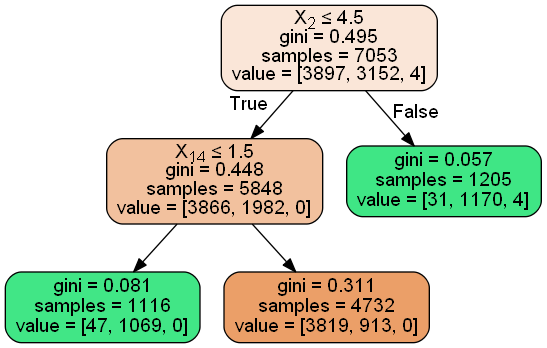

In [18]:
dot_data_entropia = StringIO()
export_graphviz(dtree, out_file=dot_data_entropia,  
                filled=True, rounded=True,
                special_characters=True)
graph_entropia = pydotplus.graph_from_dot_data(dot_data_entropia.getvalue())  
Image(graph_entropia.create_png())

In [9]:
cols=['Sex code',
       'Household status', 'Working status', 'Terminal age of education',
       'Welsh Language code', 'Gaelic language code', 'Dependency of Children',
       'Life stage', 'Ethnic Origin', 'Disability', 'No of TV Sets',
       'No of VCRs', 'No of PVRs', 'No of DVDs', 'No of People',
       'Presence of Children', 'Demographic cell 1',
       'Language Spoken at Home', 'Welsh Speaking Home',
       'Number of DVD Recorders', 'Number of DVD Players',
       'Number of Sky PVRs', 'Number of other PVRs', 'Broadband',
       'Mosaic Classification', 'No of Computers', 'Genre Drama',
       'Genre Soaps', 'Genre Series Drama Generic', 'Genre Cinema Films',
       'Genre TV Fils', 'Genre Entertainment', 'Genre Music', 'Genre Arts',
       'Genre News/Weather', 'Genre Current Affairs', 'Genre Hobbies/Leisure',
       'Genre Documentaries', 'Genre Religious', 'Genre Sport',
       'Genre Children', 'Genre PP Broadcast', 'Genre Education',
       'Genre Other Films', 'Genre Other', 'Genre Other.1']
y='Marital status'

In [10]:
train_X, test_X, train_y, test_y = train_test_split(data[cols], data[y], train_size=0.7, test_size=0.3, random_state=123)

In [11]:
dtree=DecisionTreeClassifier(max_leaf_nodes=5)
dtree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [12]:
predictions=dtree.predict(test_X)
predictions2=dtree.predict(train_X)
acc=accuracy_score(test_y, predictions)
acc2=accuracy_score(train_y, predictions2)

print(acc)
print(acc2)

0.9153439153439153
0.9211682971785056


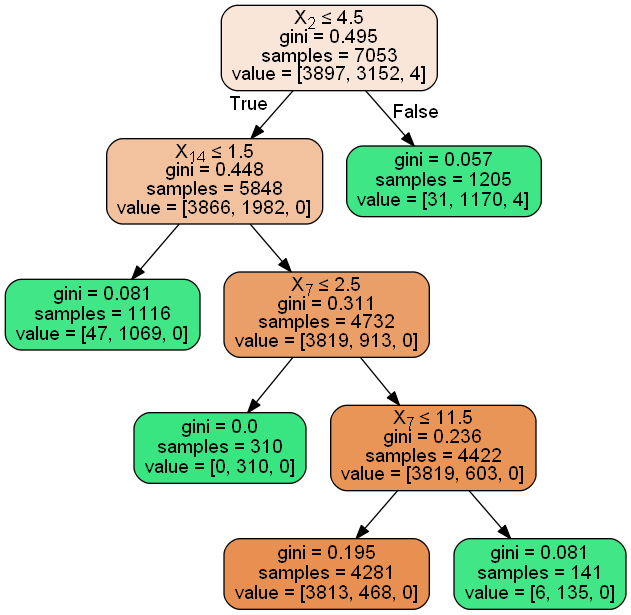

In [13]:
dot_data_entropia = StringIO()
export_graphviz(dtree, out_file=dot_data_entropia,  
                filled=True, rounded=True,
                special_characters=True)
graph_entropia = pydotplus.graph_from_dot_data(dot_data_entropia.getvalue())  
Image(graph_entropia.create_png())

In [43]:
cols=['Sex code','Marital status',
       'Household status', 'Working status', 
       'Welsh Language code', 'Gaelic language code', 'Dependency of Children',
       'Life stage', 'Ethnic Origin', 'Disability', 'No of TV Sets',
       'No of VCRs', 'No of PVRs', 'No of DVDs', 'No of People',
       'Presence of Children', 'Demographic cell 1',
       'Language Spoken at Home', 'Welsh Speaking Home',
       'Number of DVD Recorders', 'Number of DVD Players',
       'Number of Sky PVRs', 'Number of other PVRs', 'Broadband',
       'Mosaic Classification', 'No of Computers', 'Genre Drama',
       'Genre Soaps', 'Genre Series Drama Generic', 'Genre Cinema Films',
       'Genre TV Fils', 'Genre Entertainment', 'Genre Music', 'Genre Arts',
       'Genre News/Weather', 'Genre Current Affairs', 'Genre Hobbies/Leisure',
       'Genre Documentaries', 'Genre Religious', 'Genre Sport',
       'Genre Children', 'Genre PP Broadcast', 'Genre Education',
       'Genre Other Films', 'Genre Other', 'Genre Other.1']
y='Terminal age of education'

In [44]:
train_X, test_X, train_y, test_y = train_test_split(data[cols], data[y], train_size=0.7, test_size=0.3, random_state=123)

In [45]:
dtree=DecisionTreeClassifier(max_leaf_nodes=5)
dtree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [46]:
predictions=dtree.predict(test_X)
predictions2=dtree.predict(train_X)
acc=accuracy_score(test_y, predictions)
acc2=accuracy_score(train_y, predictions2)

print(acc)
print(acc2)

0.5562169312169312
0.5841485892528002
